In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset (PNAS Smart-seq-total paper)

Large dataset with rows representing genes and columns cells, with entries the recorded transcript counts
- ~50,000 genes listed but many have zero counts recorded and are not relevant / useful
- 3 types of cells combined: fibroblasts, HEK, MCF cell lines

In [2]:
data = pd.read_csv("./GSE151334_counts.human_download.csv", index_col=0)
data.head()

,Fibroblasts_A10_S10,Fibroblasts_A11_S11,Fibroblasts_A2_S2,Fibroblasts_A3_S3,Fibroblasts_A4_S4,Fibroblasts_A5_S5,Fibroblasts_A7_S7,Fibroblasts_A8_S8,Fibroblasts_B10_S34,Fibroblasts_B11_S35,...,MCF7_O11_S347,MCF7_O12_S348,MCF7_O13_S349,MCF7_O17_S353,MCF7_O4_S340,MCF7_O5_S341,MCF7_O9_S345,MCF7_P17_S377,MCF7_P3_S363,MCF7_P4_S364
7SK,18,3,6,8,35,0,0,21,9,9,...,100,25,44,40,16,37,11,14,15,18
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separate cell types

In [3]:
Fibroblast_columns = [name for name in list(data.columns) if 'Fibroblasts' in name]
HEK_columns = [name for name in list(data.columns) if 'HEK293T' in name]
MCF_columns = [name for name in list(data.columns) if 'MCF7' in name]

data_FIB = data[Fibroblast_columns]
data_HEK = data[HEK_columns]
data_MCF = data[MCF_columns]

print(f"{len(Fibroblast_columns)} Fibroblast cells \n{len(HEK_columns)} HEK cells \n{len(MCF_columns)} MCF cells")

278 Fibroblast cells 
260 HEK cells 
95 MCF cells


### Filter outlying cells

In [ ]:
# mean cell counts
FIB_cell_means = data_FIB.mean(axis=0)
HEK_cell_means = data_HEK.mean(axis=0)
MCF_cell_means = data_MCF.mean(axis=0)

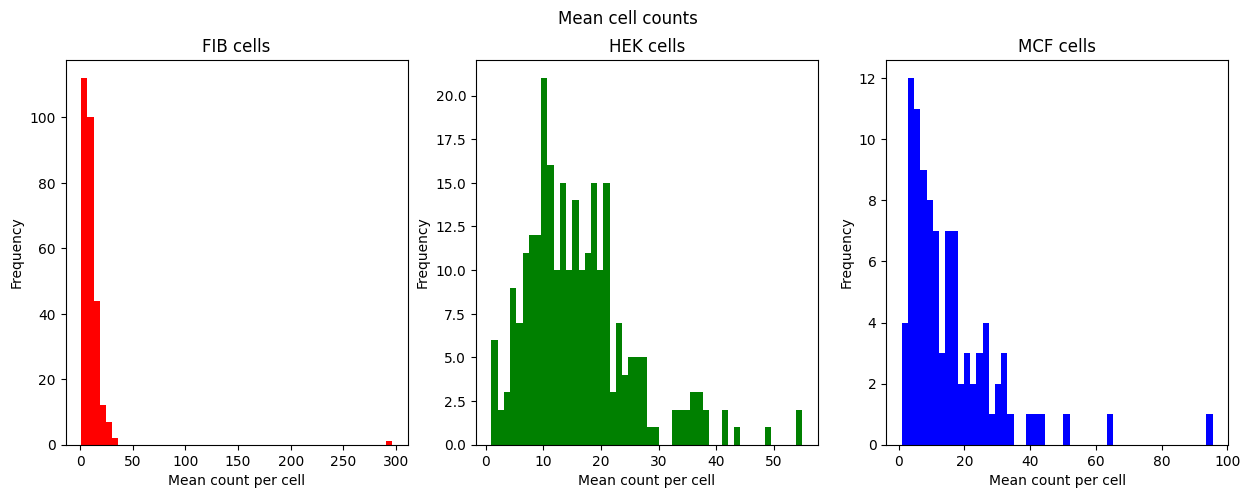

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Mean cell counts")
FIB_hist = axs[0].hist(FIB_cell_means, bins=50, color="red");
axs[0].set_title("FIB cells")
axs[0].set_xlabel("Mean count per cell")
axs[0].set_ylabel("Frequency")
HEK_hist = axs[1].hist(HEK_cell_means, bins=50, color="green");
axs[1].set_title("HEK cells")
axs[1].set_xlabel("Mean count per cell")
axs[1].set_ylabel("Frequency")
MCF_hist = axs[2].hist(MCF_cell_means, bins=50, color="blue");
axs[2].set_title("MCF cells")
axs[2].set_xlabel("Mean count per cell")
axs[2].set_ylabel("Frequency")
plt.show()

In [21]:
FIB_cell_means.sort_values(ascending=False)

Fibroblasts_P23_S383    296.263655
Fibroblasts_G20_S164     31.760280
Fibroblasts_P18_S378     31.099744
Fibroblasts_G12_S156     30.331964
Fibroblasts_D23_S95      28.464558
                           ...    
Fibroblasts_H7_S175       1.786430
Fibroblasts_B21_S45       1.681862
Fibroblasts_K14_S254      1.495602
Fibroblasts_O2_S338       1.001773
Fibroblasts_F1_S121       0.916996
Length: 278, dtype: float64

In [22]:
HEK_cell_means.sort_values(ascending=False)

HEK293T_H16_S184    54.953188
HEK293T_P15_S375    54.471633
HEK293T_D20_S92     48.783532
HEK293T_O23_S359    43.790453
HEK293T_L14_S278    41.769468
                      ...    
HEK293T_B14_S38      1.769332
HEK293T_B23_S47      1.238305
HEK293T_F18_S138     1.218616
HEK293T_E16_S112     1.067013
HEK293T_O3_S339      1.000102
Length: 260, dtype: float64

In [23]:
MCF_cell_means.sort_values(ascending=False)

MCF7_O11_S347    95.501330
MCF7_H4_S172     64.521275
MCF7_N21_S333    51.638288
MCF7_N22_S334    43.682220
MCF7_K20_S260    42.455864
                   ...    
MCF7_I3_S195      3.046727
MCF7_G8_S152      2.701091
MCF7_E13_S109     1.740965
MCF7_J19_S235     1.346539
MCF7_J4_S220      0.952438
Length: 95, dtype: float64

See that there is one FIB cell with significantly higher mean count (even before filtering low expression genes) so should be removed:

In [24]:
# remove outlying cell
data_FIB = data_FIB.drop(labels=['Fibroblasts_P23_S383'], axis=1)

### Filter low expression genes

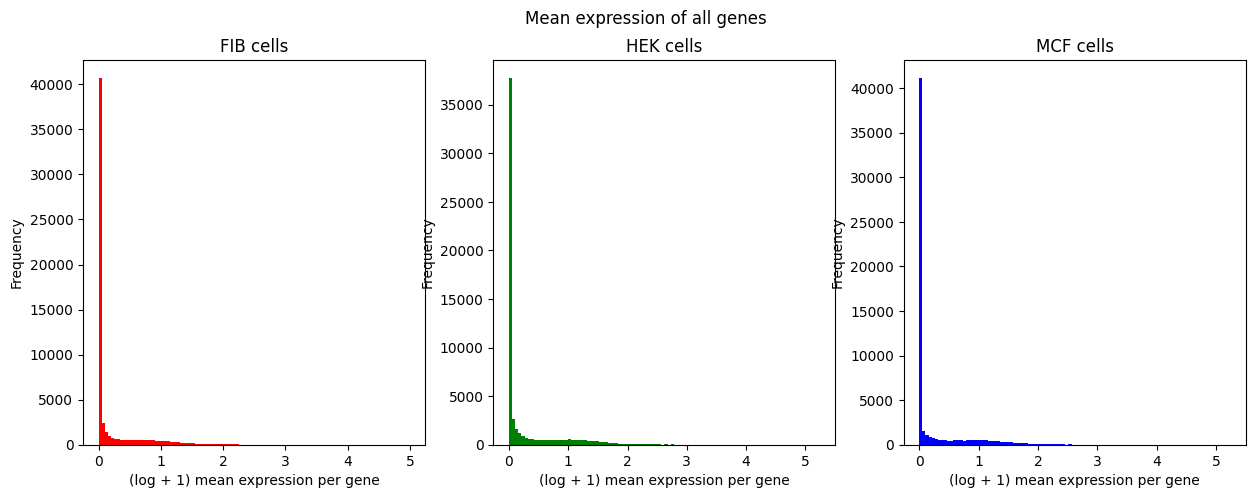

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Mean expression of all genes")
FIB_hist = axs[0].hist(np.log10(np.mean(data_FIB, axis=1) + 1), bins=100, color="red");
axs[0].set_title("FIB cells")
axs[0].set_xlabel("(log + 1) mean expression per gene")
axs[0].set_ylabel("Frequency")
HEK_hist = axs[1].hist(np.log10(np.mean(data_HEK, axis=1) + 1), bins=100, color="green");
axs[1].set_title("HEK cells")
axs[1].set_xlabel("(log + 1) mean expression per gene")
axs[1].set_ylabel("Frequency")
MCF_hist = axs[2].hist(np.log10(np.mean(data_MCF, axis=1) + 1), bins=100, color="blue");
axs[2].set_title("MCF cells")
axs[2].set_xlabel("(log + 1) mean expression per gene")
axs[2].set_ylabel("Frequency")
plt.show()

In [29]:
# remove cells with mean 0
data_filtered_FIB = data_FIB[data_FIB.mean(axis=1) > 0]
data_filtered_HEK = data_HEK[data_HEK.mean(axis=1) > 0]
data_filtered_MCF = data_MCF[data_MCF.mean(axis=1) > 0]

# display
print(f"{data_FIB.shape[0] - data_filtered_FIB.shape[0]} genes with zero counts in FIB cells")
print(f"{data_HEK.shape[0] - data_filtered_HEK.shape[0]} genes with zero counts in HEK cells")
print(f"{data_MCF.shape[0] - data_filtered_MCF.shape[0]} genes with zero counts in MCF cells")

24127 genes with zero counts in FIB cells
22139 genes with zero counts in HEK cells
33236 genes with zero counts in MCF cells


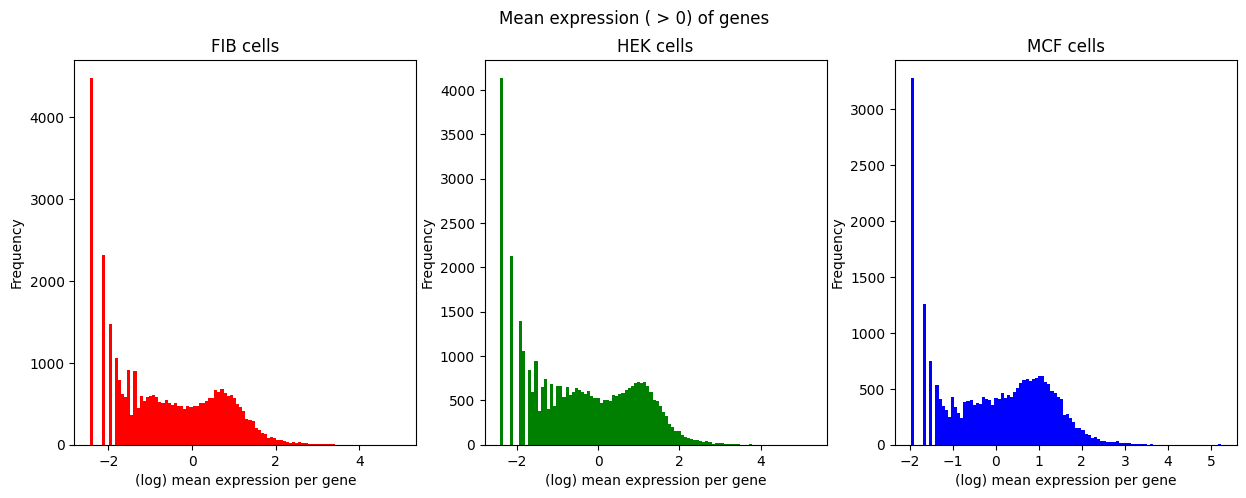

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Mean expression ( > 0) of genes ")
FIB_hist = axs[0].hist(np.log10(np.mean(data_filtered_FIB, axis=1)), bins=100, color="red");
axs[0].set_title("FIB cells")
axs[0].set_xlabel("(log) mean expression per gene")
axs[0].set_ylabel("Frequency")
HEK_hist = axs[1].hist(np.log10(np.mean(data_filtered_HEK, axis=1)), bins=100, color="green");
axs[1].set_title("HEK cells")
axs[1].set_xlabel("(log) mean expression per gene")
axs[1].set_ylabel("Frequency")
MCF_hist = axs[2].hist(np.log10(np.mean(data_filtered_MCF, axis=1)), bins=100, color="blue");
axs[2].set_title("MCF cells")
axs[2].set_xlabel("(log) mean expression per gene")
axs[2].set_ylabel("Frequency")
plt.show()

In [32]:
# remove genes with mean < 1
thresh = 1
data_thresh_FIB = data_filtered_FIB[data_filtered_FIB.mean(axis=1) > thresh]
data_thresh_HEK = data_filtered_HEK[data_filtered_HEK.mean(axis=1) > thresh]
data_thresh_MCF = data_filtered_MCF[data_filtered_MCF.mean(axis=1) > thresh]

# display
print(f"{data_filtered_FIB.shape[0] - data_thresh_FIB.shape[0]} genes with mean counts < {thresh} in Fibroblasts cells")
print(f"{data_filtered_HEK.shape[0] - data_thresh_HEK.shape[0]} genes with mean counts < {thresh} in HEK cells")
print(f"{data_filtered_MCF.shape[0] - data_thresh_MCF.shape[0]} genes with mean counts < {thresh} in MCF cells")

22786 genes with mean counts < 1 in Fibroblasts cells
22442 genes with mean counts < 1 in HEK cells
12457 genes with mean counts < 1 in MCF cells


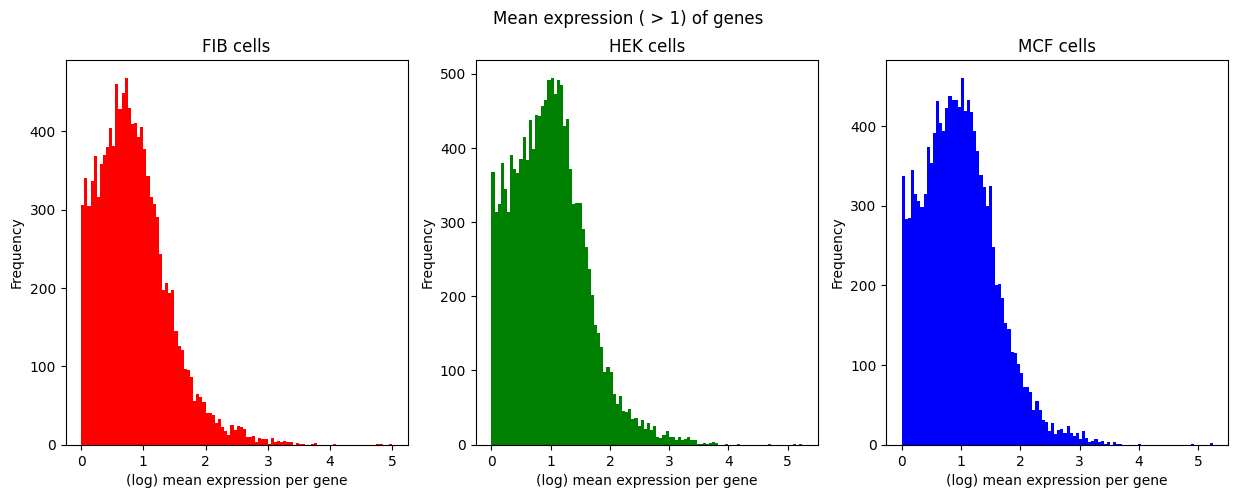

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Mean expression ( > 1) of genes")
FIB_hist = axs[0].hist(np.log10(np.mean(data_thresh_FIB, axis=1)), bins=100, color="red");
axs[0].set_title("FIB cells")
axs[0].set_xlabel("(log) mean expression per gene")
axs[0].set_ylabel("Frequency")
HEK_hist = axs[1].hist(np.log10(np.mean(data_thresh_HEK, axis=1)), bins=100, color="green");
axs[1].set_title("HEK cells")
axs[1].set_xlabel("(log) mean expression per gene")
axs[1].set_ylabel("Frequency")
MCF_hist = axs[2].hist(np.log10(np.mean(data_thresh_MCF, axis=1)), bins=100, color="blue");
axs[2].set_title("MCF cells")
axs[2].set_xlabel("(log) mean expression per gene")
axs[2].set_ylabel("Frequency")
plt.show()

### Check mean cell counts after gene filtering

In [40]:
# mean cell counts
FIB_thresh_cell_means = data_thresh_FIB.mean(axis=0)
HEK_thresh_cell_means = data_thresh_HEK.mean(axis=0)
MCF_thresh_cell_means = data_thresh_MCF.mean(axis=0)

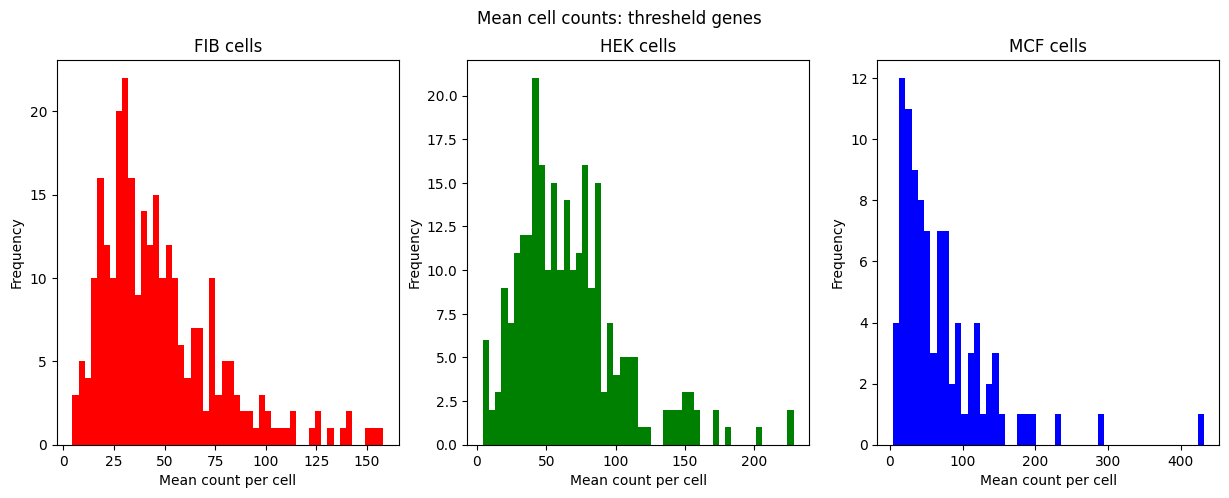

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Mean cell counts: thresheld genes")
FIB_hist = axs[0].hist(FIB_thresh_cell_means, bins=50, color="red");
axs[0].set_title("FIB cells")
axs[0].set_xlabel("Mean count per cell")
axs[0].set_ylabel("Frequency")
HEK_hist = axs[1].hist(HEK_thresh_cell_means, bins=50, color="green");
axs[1].set_title("HEK cells")
axs[1].set_xlabel("Mean count per cell")
axs[1].set_ylabel("Frequency")
MCF_hist = axs[2].hist(MCF_thresh_cell_means, bins=50, color="blue");
axs[2].set_title("MCF cells")
axs[2].set_xlabel("Mean count per cell")
axs[2].set_ylabel("Frequency")
plt.show()

Some HEK and MCF cells have high mean counts and will need to be looked at before this data is used. 

### Save data

In [42]:
data_thresh_FIB.to_csv("./GSE151334_FIB_counts_thresh.csv")
data_thresh_HEK.to_csv("./GSE151334_HEK_counts_thresh.csv")
data_thresh_MCF.to_csv("./GSE151334_MCF_counts_thresh.csv")

## Comparison to gene then cell removal

In [ ]:
# load old dataset
data_FIB_old = pd.read_csv("../../../Real-Data/Datasets/GSE151334_FIB_counts_thresh.csv", index_col=0)
data_FIB_old = data_FIB_old.drop(labels=['Fibroblasts_P23_S383'], axis=1)

In [60]:
# sets of genes
old_genes = set(data_FIB_old.index)
new_genes = set(data_thresh_FIB.index)

In [61]:
# not a strict reduction in genes
new_genes.issubset(old_genes)

False

In [ ]:
# 8 new genes added
len(new_genes - old_genes)

8

In [ ]:
# 162 genes removed
len(old_genes - new_genes)

162

In [67]:
# overall 170 genes different
len(set(data_thresh_FIB.index) ^ set(data_FIB_old.index))

170